In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [58]:
output_data_file = "Resources/student-merge.csv"
por_path = "Resources/student-por.csv"
math_path = "Resources/student-mat.csv"

por_df = pd.read_csv(por_path)
math_df = pd.read_csv(math_path)

In [59]:
students_df = pd.merge(por_df, math_df, on=["school","sex","age","address","famsize",
                                            "Pstatus","Medu","Fedu","Mjob","Fjob","reason",
                                            "guardian", "traveltime","nursery","higher",
                                            "internet","romantic","famrel","freetime",
                                            "goout","Dalc","Walc","health"])
students_df.columns = students_df.columns.str.replace("_x","_por")
students_df.columns = students_df.columns.str.replace("_y","_math")
students_df.to_csv(output_data_file)
students_df

PermissionError: [Errno 13] Permission denied: 'Resources/student-merge.csv'

F    195
M    175
Name: sex, dtype: int64


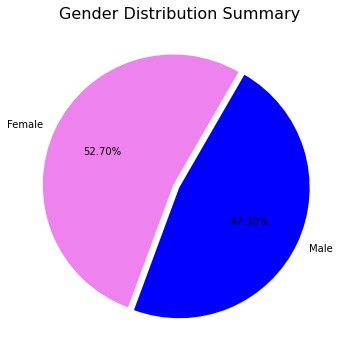

In [60]:
# Generate a pie plot showing the distribution of female versus male  using Pandas
# Do boys tend to consume alcohol or girls?
gender_count=students_df["sex"].value_counts()
print(gender_count)
colour_plot=["violet","blue"]
explode_plot=(0.05,0)
plt.pie(gender_count,labels=['Female','Male'],autopct='%0.2f%%',colors=colour_plot,explode=explode_plot,startangle=60)
plt.title("Gender Distribution Summary",fontsize=16)
plt.show()


array([<AxesSubplot:title={'center':'G3_math'}, xlabel='sex'>,
       <AxesSubplot:title={'center':'G3_por'}, xlabel='sex'>],
      dtype=object)

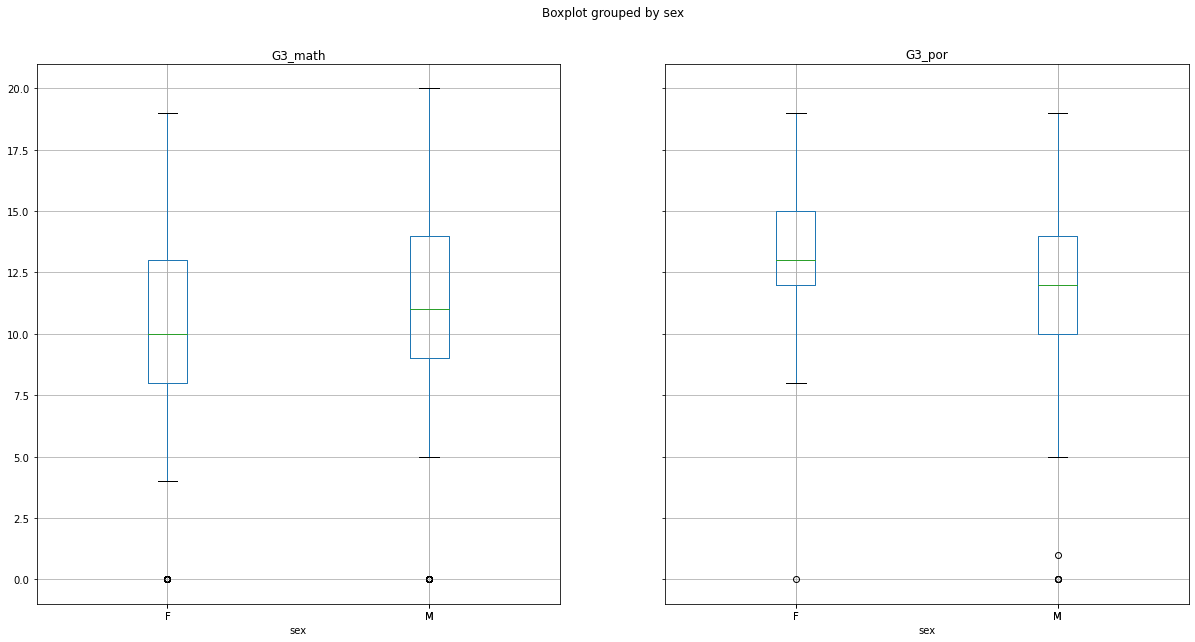

In [61]:
students_df.boxplot(["G3_math","G3_por"], by="sex", figsize=(20, 10))

In [62]:
age_count=students_df["age"].value_counts()

student_age=students_df["age"].unique()

In [63]:
student_age_mean=students_df["age"].mean()
student_age_median=students_df["age"].median()

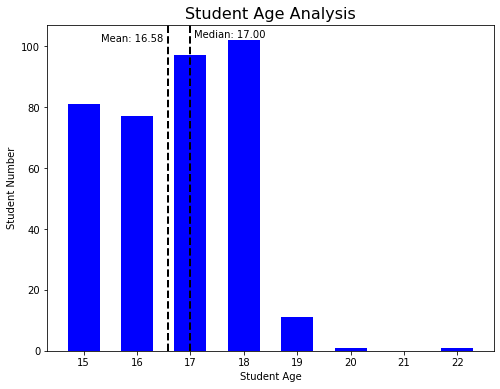

In [64]:

fig=plt.bar(student_age,age_count,color='b',align="center", width= 0.6)
plt.title("Student Age Analysis",fontsize=16)
plt.xlabel("Student Age")
plt.ylabel("Student Number")
plt.rcParams['figure.figsize'] = [8, 6]
plt.axvline(student_age_mean, color='k', linestyle='dashed', linewidth=2)
plt.axvline(student_age_median, color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(student_age_mean*0.925, max_ylim*0.95, 'Mean: {:.2f}'.format(student_age_mean))

plt.text(student_age_mean*1.03, max_ylim*0.96, 'Median: {:.2f}'.format(student_age_median))
plt.show()

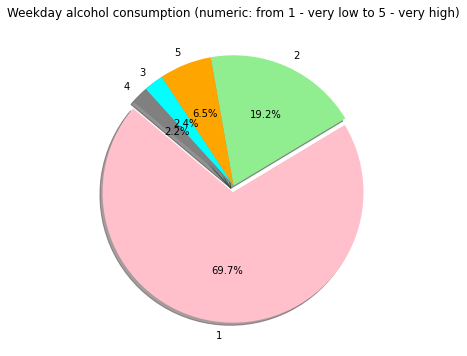

In [65]:
labels = students_df["Dalc"].unique()
amount = students_df["Dalc"].value_counts()

colours = ["pink","lightgreen","orange","cyan","gray"]
explode_plot=(0.05,0,0,0,0)

plt.pie(amount, explode=explode_plot, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Weekday alcohol consumption (numeric: from 1 - very low to 5 - very high)")
plt.show()





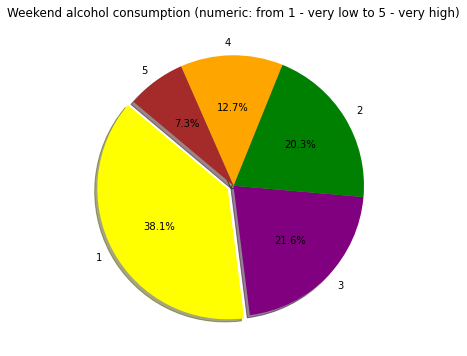

In [66]:
labels = students_df["Walc"].unique()
amount = students_df["Walc"].value_counts()

colours = ["yellow","purple","green","orange","brown"]
explode_plot=(0.05,0,0,0,0)

plt.pie(amount, explode=explode_plot, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)")
plt.show()



In [67]:
x1 = students_df.loc[students_df["paid_math"]=="yes","paid_math"].count()
x2 = students_df.loc[students_df["paid_por"]=="yes","paid_por"].count()
x3 = students_df.loc[students_df["paid_math"]=="no","paid_math"].count()
x4 = students_df.loc[students_df["paid_por"]=="no","paid_por"].count()


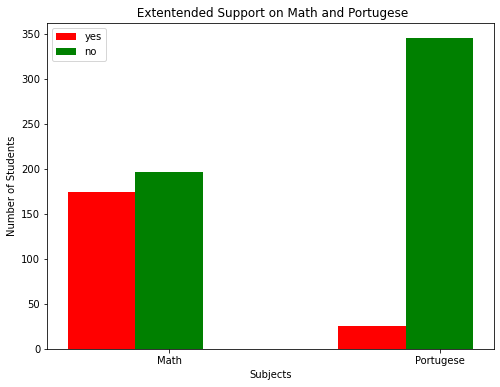

In [68]:


N = 2
ind = np.arange(N) 
width = 0.25
  
bar1 = plt.bar(ind, [x1,x2], width, color = 'r', label= 'yes')
  

bar2 = plt.bar(ind+width, [x3,x4], width, color='g', label='no')
  

  
plt.xlabel("Subjects")
plt.ylabel('Number of Students')
plt.title(" Extentended Support on Math and Portugese")
  
plt.xticks(ind+width,['Math', 'Portugese'])
plt.legend( (bar1, bar2), ('yes', 'no') )
plt.show()

array([<AxesSubplot:title={'center':'G3_math'}, xlabel='romantic'>,
       <AxesSubplot:title={'center':'G3_por'}, xlabel='romantic'>],
      dtype=object)

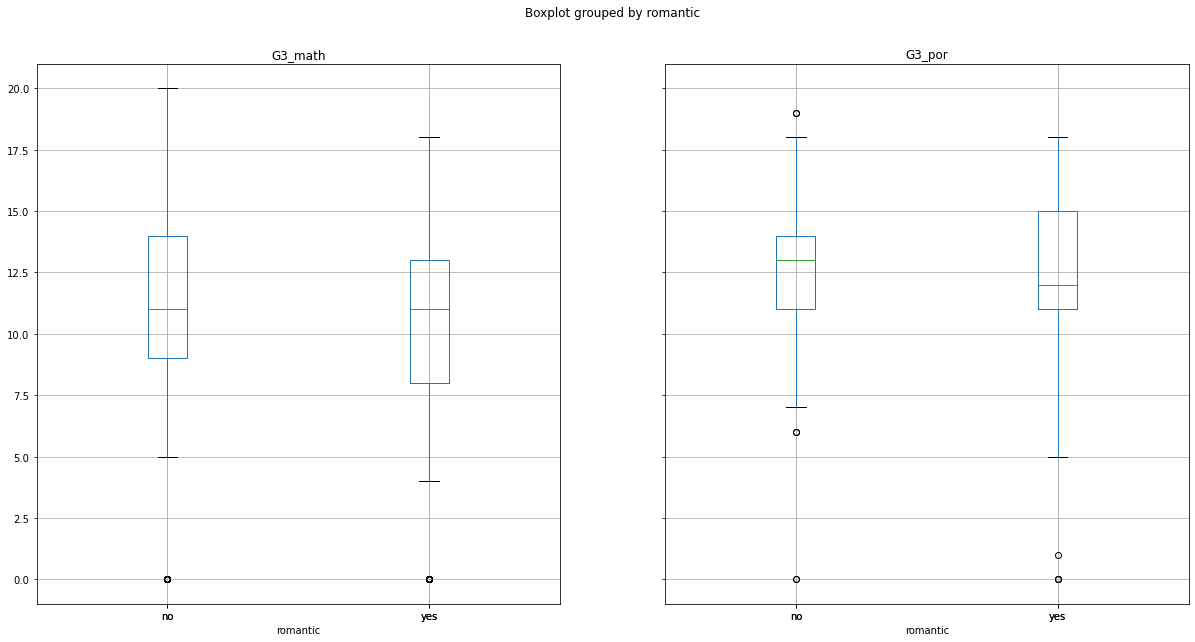

In [69]:

students_df.boxplot(["G3_math","G3_por"], by="romantic", figsize=(20, 10))

array([<AxesSubplot:title={'center':'G3_math'}, xlabel='Dalc'>,
       <AxesSubplot:title={'center':'G3_por'}, xlabel='Dalc'>],
      dtype=object)

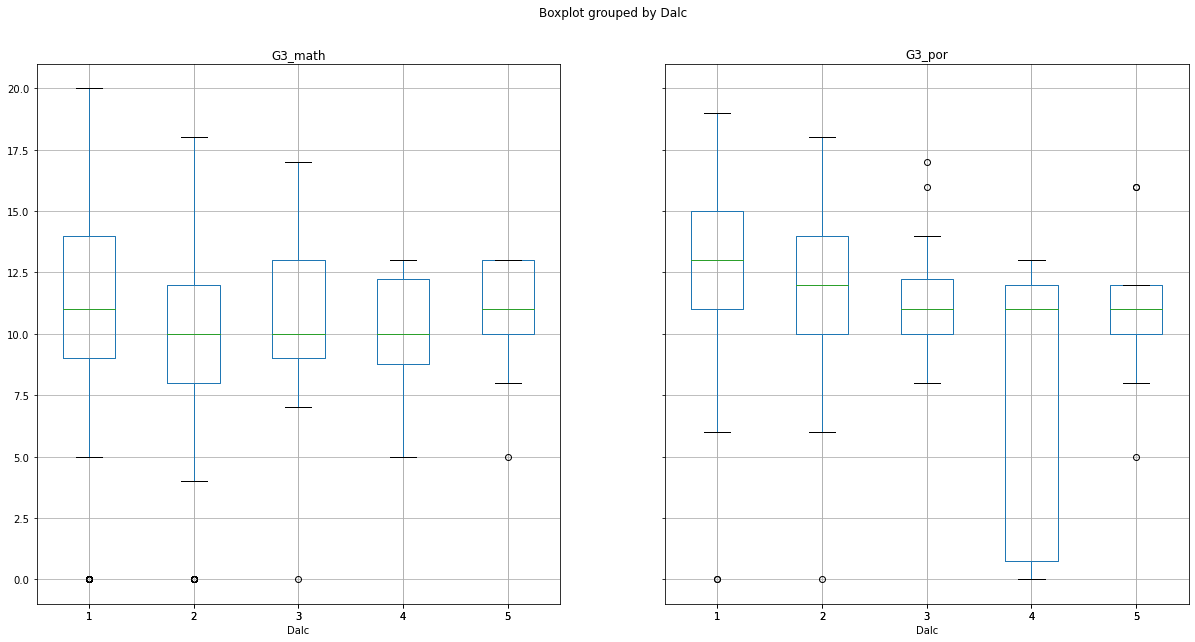

In [71]:
students_df.boxplot(["G3_math","G3_por"], by="Dalc", figsize=(20, 10))


In [72]:
group1 = students_df[students_df["Dalc"] == 1]["G3_math"]
group2 = students_df[students_df["Dalc"] == 2]["G3_math"]
group3 = students_df[students_df["Dalc"] == 3]["G3_math"]
group4 = students_df[students_df["Dalc"] == 4]["G3_math"]
group5 = students_df[students_df["Dalc"] == 5]["G3_math"]

In [73]:
stats.f_oneway(group1, group2, group3, group4,group5)

F_onewayResult(statistic=1.113585395009432, pvalue=0.3497837813433307)

array([<AxesSubplot:title={'center':'G3_math'}, xlabel='Walc'>,
       <AxesSubplot:title={'center':'G3_por'}, xlabel='Walc'>],
      dtype=object)

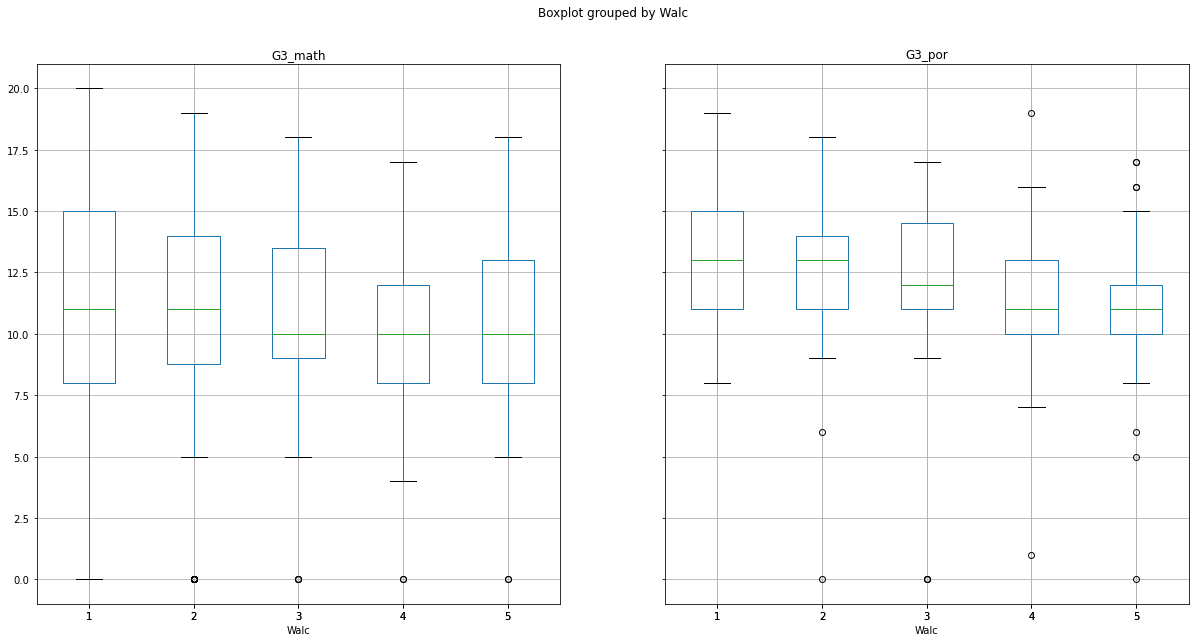

In [74]:
students_df.boxplot(["G3_math","G3_por"], by="Walc", figsize=(20, 10))

In [75]:
group1 = students_df[students_df["Walc"] == 1]["G3_math"]
group2 = students_df[students_df["Walc"] == 2]["G3_math"]
group3 = students_df[students_df["Walc"] == 3]["G3_math"]
group4 = students_df[students_df["Walc"] == 4]["G3_math"]
group5 = students_df[students_df["Walc"] == 5]["G3_math"]

In [76]:
stats.f_oneway(group1, group2, group3, group4,group5)

F_onewayResult(statistic=0.40021419738346875, pvalue=0.808482036488183)